In [39]:
import pickle
from gensim.models import word2vec, Word2Vec
import multiprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import pickle
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from scipy.spatial.distance import cosine
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from chembl_webresource_client.new_client import new_client
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Reshape, GRU, SpatialDropout1D, LSTM, Dropout, RepeatVector
from keras.layers import BatchNormalization, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KDTree
from sklearn.svm import SVC

from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import adam
from keras import backend as K
from keras.models import Model
from keras import initializers
from keras.engine.topology import Layer
from keras.layers import Dense, Input
from keras.layers import Embedding, GRU, Bidirectional, TimeDistributed
from tensorflow.python.ops.rnn import bidirectional_dynamic_rnn
import nltk
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/dweepa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
with open("./data/mol_sentences.pkl", "rb") as file:
    sentences = pickle.load(file)
    
atc = [sentence[1][0] for sentence in sentences]
sentences = [sentence[3] for sentence in sentences]
sentences = np.asarray([np.asarray(xi).reshape(len(xi),1) for xi in sentences])
sentences = pad_sequences(sentences, maxlen=224, dtype='int32', padding='post', truncating='pre', value=0.0)
sentences.shape

(2731, 224, 1)

In [12]:
le = LabelEncoder()
le.fit(atc)

atc = le.transform(atc)

In [13]:
atc[0]

7

In [14]:
latent_dim = 100
num_encoder_tokens = 224
num_decoder_tokens = 224

encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]


decoder_inputs = Input(shape=(None, num_decoder_tokens))

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [22]:
w2v = word2vec.Word2Vec.load('../SPVec/model_300dim.pkl')
# w2v = word2vec.Word2Vec.load('my_100.model')

In [24]:
sentences.shape

(2731, 224, 1)

In [28]:
np.asarray(sentences[0])

array([[-2048238559],
       [ -757847781],
       [-2049693695],
       [-1871423689],
       [-2048238559],
       [ -757847781],
       [-2049583024],
       [ 1582607016],
       [-2049693695],
       [  -70991136],
       [  847961216],
       [ 1362518133],
       [-2048267481],
       [  -72115651],
       [  864942730],
       [ 1510328189],
       [-2049693695],
       [  -70991136],
       [-2049583024],
       [ -291917706],
       [  864674487],
       [-1477475904],
       [-2049689486],
       [  135980867],
       [-2048238559],
       [ -757843576],
       [-2048238559],
       [ -757843576],
       [-2048238559],
       [ -757843576],
       [  847961216],
       [ 1362518133],
       [-2048267481],
       [  -72115651],
       [  864942730],
       [ 1510328189],
       [-2049693695],
       [  -70991136],
       [-2049583024],
       [   74537039],
       [-1077586588],
       [ -173211942],
       [-1076273327],
       [  951226070],
       [-1076273327],
       [  

In [40]:
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import text

In [42]:
with open("./data/mol_sentences.pkl", "rb") as file:
    sentences = pickle.load(file)
    
atc = [sentence[1][0] for sentence in sentences]
sentences = [sentence[3] for sentence in sentences]

In [43]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sentences)
print("Word Index: ",tokenizer.word_index)

Word Index:  {'3218693969': 1, '3217380708': 2, '951226070': 3, '2245384272': 4, '2968968094': 5, '2246728737': 6, '864942730': 7, '2976033787': 8, '98513984': 9, '864662311': 10, '2246699815': 11, '1510328189': 12, '864674487': 13, '2092489639': 14, '2245273601': 15, '994485099': 16, '10565946': 17, '2041434490': 18, '2117068077': 19, '2803848648': 20, '847961216': 21, '2976816164': 22, '1510461303': 23, '3542456614': 24, '3189457552': 25, '3537119515': 26, '847957139': 27, '1533864325': 28, '2142032900': 29, '1861965050': 30, '266675433': 31, '882399112': 32, '2132511834': 33, '1016841875': 34, '3975275337': 35, '26234434': 36, '2119439498': 37, '2228063684': 38, '848128881': 39, '2246703798': 40, '3452535345': 41, '3818546315': 42, '422715066': 43, '1276993226': 44, '1542633699': 45, '517457164': 46, '864942795': 47, '3537123720': 48, '4121755354': 49, '1135286194': 50, '2245277810': 51, '1535166686': 52, '2076190208': 53, '4008337421': 54, '1100037548': 55, '3351556771': 56, '11019

In [52]:
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size=100
wids = [[word2id[w] for w in doc] for doc in sentences]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 2825
Vocabulary Sample: [('3218693969', 1), ('3217380708', 2), ('951226070', 3), ('2245384272', 4), ('2968968094', 5), ('2246728737', 6), ('864942730', 7), ('2976033787', 8), ('98513984', 9), ('864662311', 10)]


In [45]:
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(2806018737 (241), 4291280580 (1465)) -> 0
(2968968094 (5), 2803848648 (20)) -> 1
(2245384272 (4), 1583799011 (83)) -> 1
(847961216 (21), 2238073819 (840)) -> 0
(864942730 (7), 2246699815 (11)) -> 1
(74537039 (113), 3118255683 (129)) -> 1
(2117068077 (19), 3320199913 (975)) -> 1
(1510328189 (12), 1639024486 (2769)) -> 0
(864942730 (7), 1667497117 (1064)) -> 0
(1510461303 (23), 2192549961 (2109)) -> 0


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       282500      input_11[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
reshape_28 (Reshape)            (None, 100, 1)       0           embedding[0][0]                  
__________

/Users/dweepa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


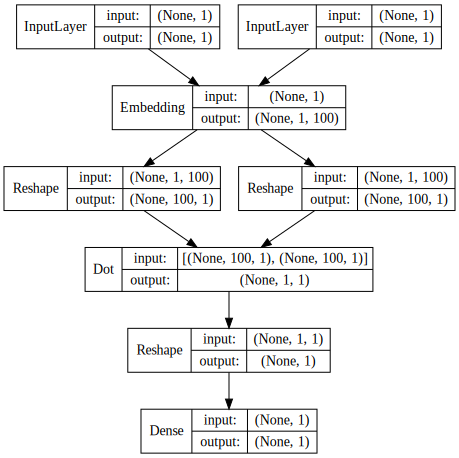

In [86]:
from keras.layers.core import Dense, Reshape
from keras.layers.merge import dot
from keras.layers.embeddings import Embedding
from keras.models import Sequential

input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(vocab_size, embed_size, input_length=1, name='embedding')
word_embedding = embedding(input_target)
word_embedding = Reshape((embed_size, 1))(word_embedding)

context_embedding = embedding(input_context)
context_embedding = Reshape((embed_size, 1))(context_embedding)

# now perform the dot product operation  
dot_product = dot([word_embedding, context_embedding], axes=1)
dot_product = Reshape((1,))(dot_product)

# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

model = Model(input=[input_target, input_context], output=output)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# view model summary
print(model.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [76]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        try:
            pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
            pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
            labels = np.array(elem[1], dtype='int32')
            X = [pair_first_elem, pair_second_elem]
            Y = labels
            if i % 100 == 0:
                print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
            loss += model.train_on_batch(X,Y)  
        except:
            break
    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs
Processed 600 (skip_first, skip_second, relevance) pairs
Processed 700 (skip_first, skip_second, relevance) pairs
Processed 800 (skip_first, skip_second, relevance) pairs
Processed 900 (skip_first, skip_second, relevance) pairs
Processed 1000 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 126.21658808365464
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs


In [90]:
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values()).head()

(2824, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3218693969,-0.039572,0.038377,-0.021947,0.021711,-0.013027,0.008427,0.043991,-0.020688,0.017700,-0.028070,...,0.023635,0.039498,-0.001878,-0.007752,-0.036900,0.047002,-0.027339,-0.038775,-0.038375,-0.040498
3217380708,0.045160,-0.000112,0.006033,0.030739,0.049594,-0.032447,0.012232,0.005060,-0.009834,0.038288,...,-0.030748,-0.035396,-0.042271,0.001170,-0.000970,0.001188,0.032455,0.015597,0.049190,0.048444
951226070,0.020445,-0.035958,0.049797,-0.012746,0.040990,-0.048180,-0.006705,-0.027713,0.009214,-0.002259,...,0.029544,0.028820,-0.046359,-0.028430,0.002211,-0.039659,-0.034330,0.037923,-0.036020,0.017811
2245384272,0.026833,0.021057,-0.045638,0.035408,0.003620,-0.026168,0.020396,-0.018953,0.001153,0.011454,...,0.021670,0.009759,-0.030947,0.024400,0.006321,0.008736,0.008603,0.038485,0.028815,0.017528
2968968094,-0.038134,-0.000992,-0.021584,-0.011967,0.042714,0.016585,0.009588,-0.006898,0.037891,-0.049127,...,0.026797,-0.030163,-0.023180,-0.038782,0.042091,0.033211,-0.009193,0.028397,-0.043833,0.048428


In [95]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['2246728737','3537119515','2245273601','2423543607']}

similar_words

(2824, 2824)


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


{'2245273601': ['2245108812',
  '2606734789',
  '1732352589',
  '3458774156',
  '4223486634'],
 '2246728737': ['2410786482',
  '3873101583',
  '3722245674',
  '3895633315',
  '2070976245'],
 '2423543607': ['2245108812',
  '3482873808',
  '3990065839',
  '785693365',
  '3151378920'],
 '3537119515': ['723026879',
  '3593618068',
  '3383986124',
  '1636327326',
  '1181021693']}

Total words: 24 	Word Embedding shapes: (24, 100)


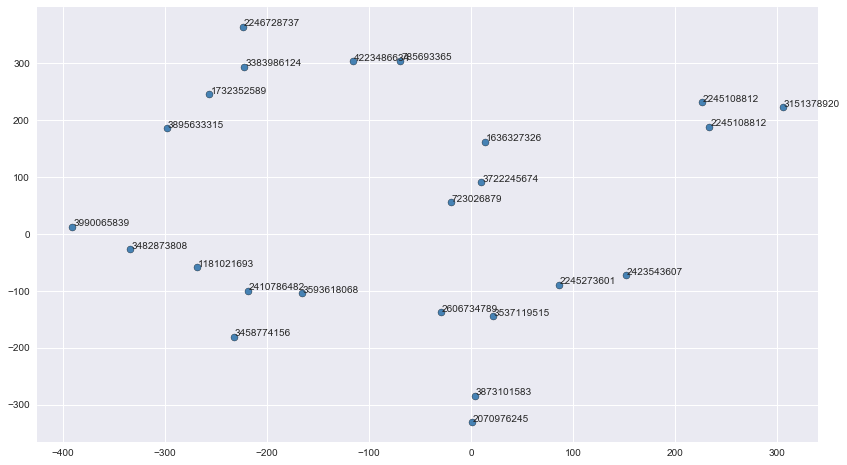

In [96]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')